In [2]:
import networkx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy
import time
from collections import Counter
import random


# Barabasi Free Scale Network

In [3]:
def prob_calc(nodes): # calculate the prob of the nodes being used in barbasi_albert node generation
    nodesProbs = []
    tDegree= (2 * len(nodes.edges()))
    for node in nodes.nodes():
        nodeDegree = nodes.degree(node)
        nodeProb = nodeDegree / tDegree
        nodesProbs.append(nodeProb)
    randomNodes = np.random.choice(nodes.nodes(),4,p=nodesProbs,replace=False)
    return randomNodes

In [4]:
def barbasi_albert(n,initNodes):
    newNodes = initNodes # first node
    nodes = networkx.empty_graph(initNodes) # empty graph
    # making 5 nodes that are in ciricle from 0 to 4
    for i in range(0,3):
        nodes.add_edge(i, i+1)
        if (i+1) == 4:
            nodes.add_edge(i+1, 0)
    # the upcoming node to be added to the existing nodes on the bases of probability
    for node in range(n):
        nodes.add_node(newNodes)
        randomNodes=prob_calc(nodes)
        for randomNode in randomNodes:
            nodes.add_edge(newNodes,randomNode)
        newNodes += 1
    return nodes            

In [5]:
g = barbasi_albert(10000, 5) # making barbasi nodes of 10000

In [6]:
barbasi_pd_ed = pd.DataFrame(g.edges(),columns=['Node','Edge'])
barbasi_pd_deg = pd.DataFrame(g.degree(),columns=['Node', 'Degree'])

In [7]:
# exponenet function conversation
def exp_func(x, a, b):
    c = x*b
    return a * np.exp(-c)

In [8]:
def lin_func(x, a, b):
    return a*x + b

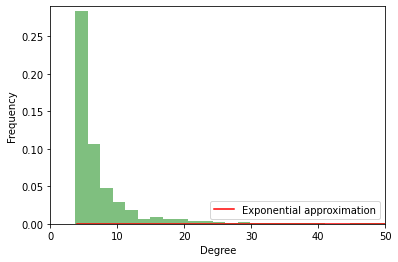

In [9]:
spaced_samples = np.linspace(4, 80, 100)
plt.xlim(0, 50)
plt.ylim(0, 0.29)
n, bins, patches =plt.hist(barbasi_pd_deg['Degree'],200, density=1 ,alpha=0.5 ,color='g')
popt, pcov = scipy.optimize.curve_fit(exp_func, bins[:200], n)
plt.plot(spaced_samples, exp_func(spaced_samples, *popt), 'r-', label='Exponential approximation')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend(loc='lower right')
plt.show()

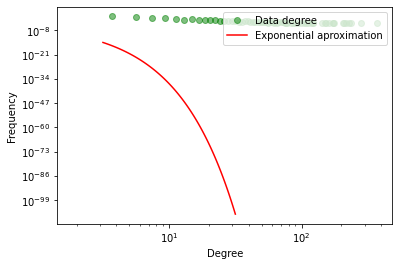

In [10]:
plt.loglog(bins[:200], n, basex=10, basey=10, linestyle="", marker="o",color='g' ,alpha=0.5,label = 'Data degree')
log_X = np.logspace(0.5,1.5,100 ,base=10)
plt.plot(log_X, exp_func(log_X, *popt), 'r-', label='Exponential aproximation')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

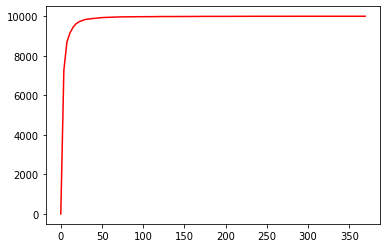

In [11]:
values, base = np.histogram(barbasi_pd_deg['Degree'], bins=100)
cumulative = np.cumsum(values)
plt.plot(base[:-1], cumulative, c='red')